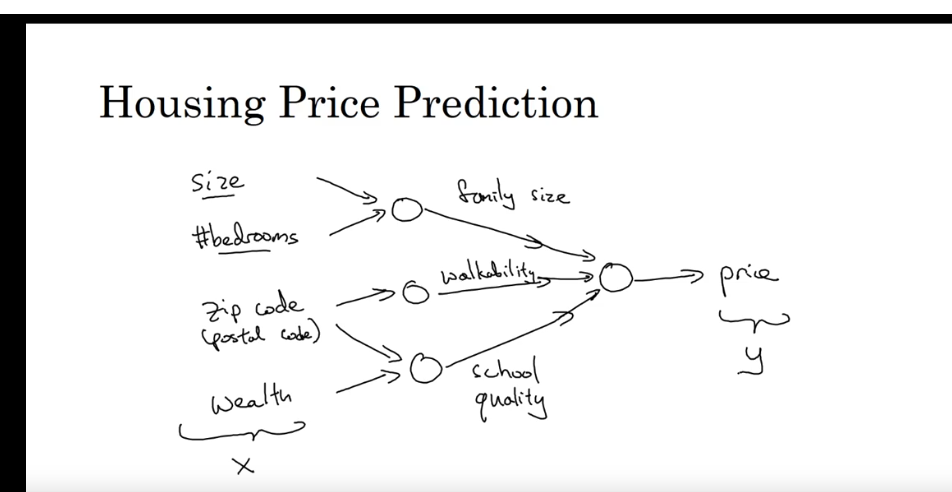

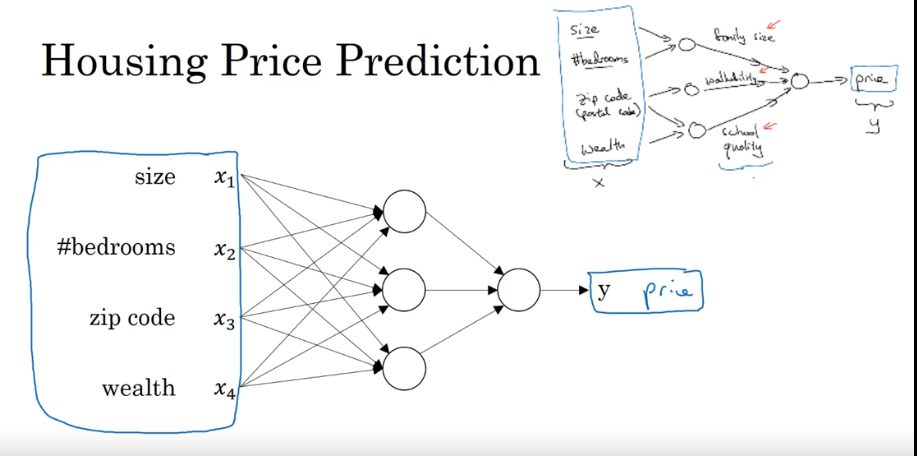

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [ ]:
iris = load_iris(as_frame=True)


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA521'>💡 Let’s run through how backpropagation works again in a bit more detail:</font></h3>
    

It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.

Each mini-batch enters the network through the input layer. The algorithm then computes the output of all the neurons in the first hidden layer, for every instance in the mini-batch. The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.

Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

Then it computes how much each output bias and each connection to the output layer contributed to the error. This is done analytically by applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.

The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until it reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights and biases in the network by propagating the error gradient backward through the network (hence the name of the algorithm).

Finally, the algorithm performs a gradient descent step to tweak all the connection weights in the network, using the error gradients it just computed.



In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">
        🎇 Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).
    </h1>  
     
</div>

In [ ]:
y_pred

In [ ]:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

In [ ]:
# extra code – plots the decision boundary of a Perceptron on the iris dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

# Activation Function:

- 1 Sigmoid function-->
 σ(z) = 1 / (1 + exp(–z)),
 
- 2 The hyperbolic tangent function: 
tanh(z) = 2σ(2z) – 1

Just like the sigmoid function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from **–1 to 1** (instead of **0 to 1** in the case of the sigmoid function). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.

- 3 The rectified linear unit function: ReLU(z) = max(0, z)


In [ ]:
# extra code – this cell generates and saves Figure 10–8

from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)  # 

In [ ]:
rmse

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">
The MLPRegressor class uses the mean squared error, which is usually what you want for regression, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you may want to use the Huber loss, which is a combination of both. It is quadratic when the error is smaller than a threshold δ (typically 1) but linear when the error is larger than δ. The linear part makes it less sensitive to outliers than the mean squared error, and the quadratic part allows it to converge faster and be more precise than the mean absolute error. However, MLPRegressor only supports the MSE.



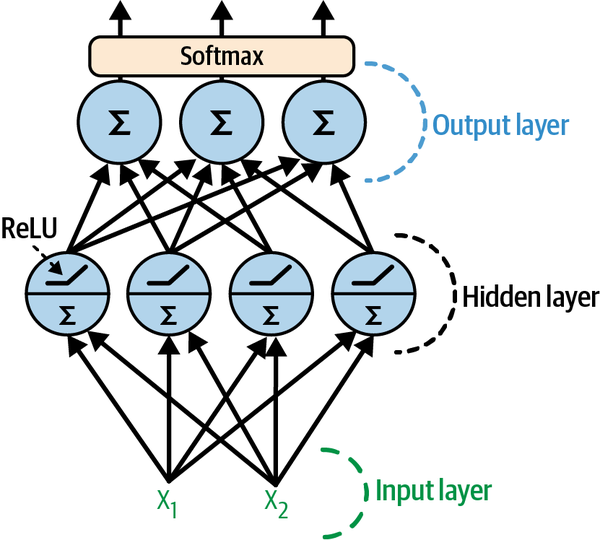

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()


In [ ]:
fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))

model.add(tf.keras.layers.Flatten())
##Then we add a Flatten layer. Its role is to convert each input image into a
#1D array: for example, if it receives a batch of shape [32, 28, 28],
#it will reshape it to [32, 784]. In other words, if it receives input data X, 
#it computes X.reshape(-1, 784). This layer doesn’t have any parameters;
#it’s just there to do some simple preprocessing.
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

In [ ]:
model.layers

In [ ]:
 hidden1 = model.layers[1]

In [ ]:
hidden1.name

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

In [ ]:
biases

In [ ]:
weights.shape

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">
    After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">
    we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification or multilabel binary classification, then we would use the "sigmoid" activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
 history = model.fit(X_train, y_train, epochs=30,
                  validation_data=(X_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

### The Vanishing/Exploding Gradients Problems
Vanishing Gradients
Problem: Gradients become increasingly small as they propagate backward through the network, making it difficult to update earlier layers.

Impact: Slows down training or prevents learning altogether.
Common Causes:

Deep networks with many layers
Activation functions like sigmoid and tanh with saturated outputs (gradients near zero)

Exploding Gradients

Problem: Gradients become increasingly large, leading to unstable updates and divergence.

Impact: Training becomes unstable and can diverge.

Common Causes:
Large weight initializations
Long sequences in recurrent neural networks

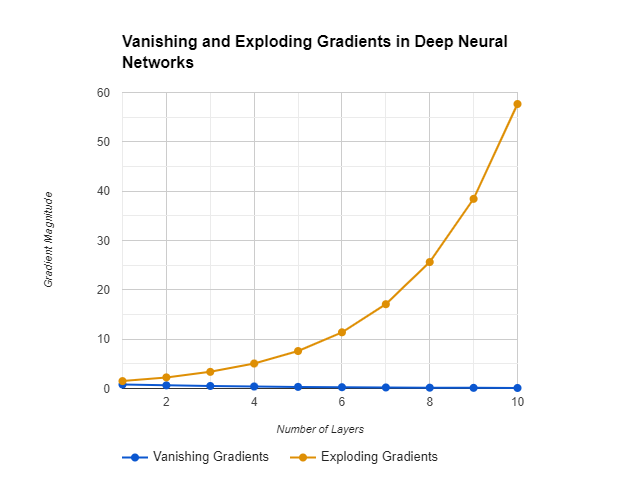e_u5lxveu5lxveu5lx.png](attachment:0e4364a1-d3ab-49f2-90d8-9eac0bae4d3a.png)
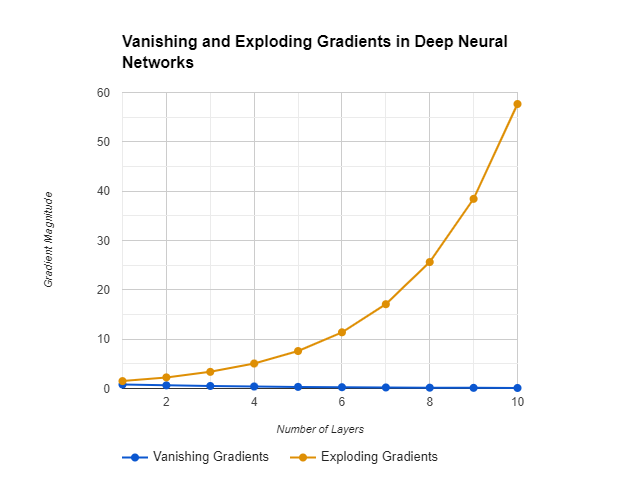

## Glorot and He Initialization


Glorot and He initialization are techniques used to initialize the weights of neural networks to prevent the vanishing or exploding gradient problem during training. This problem arises when gradients become extremely small or large, hindering the learning process


ACtivation Function:
Relu :
- **Dying ReLU**: A neuron becomes "dead" when its output consistently remains zero due to negative inputs.
- **Cause**: The ReLU function's gradient is zero for negative inputs, preventing weight updates through backpropagation.
- **Consequences**: Reduced network capacity, slower training, and degraded performance.



1. **Leaky ReLU**
- Introduces a small, non-zero gradient for negative inputs.
- Formula: f(x) = max(0.01x, x)
- Prevents the neuron from dying completely.

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">
    
**ReLU** is usually a good default for the hidden layers, as it is fast and yields good results. Its ability to output precisely zero can also be useful in some cases (e.g., see Chapter 17). Moreover, it can sometimes benefit from optimized implementations as well as from hardware acceleration. The **leaky ReLU** variants of ReLU can improve the model's quality without hindering its speed too much compared to ReLU. For large neural nets and more complex problems, GLU, Swish and Mish can give you a slightly higher quality model, but they have a computational cost. **The hyperbolic tangent (tanh)** can be useful in the output layer if you need to output a number in a fixed range (by default between –1 and 1), but nowadays it is not used much in hidden layers, except in recurrent nets. **The sigmoid activation function** is also useful in the output layer when you need to estimate a probability (e.g., for binary classification), but it is rarely used in hidden layers (there are exceptions—for example, for the coding layer of variational autoencoders; see Chapter 17). **The softplus activation function**is useful in the output layer when you need to ensure that the output will always be positive. **The softmax activation function** is useful in the output layer to estimate probabilities for mutually exclusive classes, but it is rarely (if ever) used in hidden layers.


## What is Transfer Learning?
Transfer learning is a machine learning technique where a model trained on one task is reused as a starting point for a model on a second related task. In essence, it's about transferring knowledge gained from solving one problem to improve performance on a different but related problem.   

### Why Use Transfer Learning?
- Saves time and computational resources: Pre-trained models have already learned valuable features, reducing training time.   
- Improves performance: Leveraging knowledge from a large dataset often leads to better results.
- Reduces data requirements: Effective even with small datasets.  

### How Does it Work?
- Choose a pre-trained model: Select a model trained on a large, similar dataset.   
- Load the model: Import the pre-trained model into your code.
- Freeze initial layers: Prevent changes to the lower layers, as they capture general features.
- Replace top layers: Add new layers tailored to your specific task.
- Train the new layers: Train only the added layers using your data.
- Fine-tune (optional): Unfreeze some lower layers for further optimization.

Example: Image Classification

Imagine you want to classify images of different types of flowers (roses, tulips, daisies) with a limited dataset.

- Use a pre-trained model: VGG16 or ResNet50, trained on ImageNet.   
- Freeze initial layers: These layers capture general image features.   
- Replace top layers: Add new layers for flower classification.
- Train new layers: Use your flower image dataset to train the added layers.
- Fine-tune (optional): If needed, unfreeze some lower layers and retrain.

## Key Considerations
- Task similarity: The more similar the tasks, the better the transfer.
- Computational resources: Fine-tuning can be computationally expensive.   
- Overfitting: Be cautious with small datasets.

## When to Use Transfer Learning
- Limited data available   
- Computational constraints
- Similar tasks
- Popular Use Cases
- Image classification
- Natural language processing
- Object detection

## Faster Optimizers:
In this section we will present the most popular optimization algorithms: momentum, Nesterov accelerated gradient, AdaGrad, RMSProp, and finally Adam and its variants

 It would be nice if the algorithm could correct its direction earlier to point a bit more toward the global optimum. **The AdaGrad algorithm⁠** achieves this correction by scaling down the gradient vector along the steepest dimensions




## 1. What is Backpropagation?
Backpropagation is a method used in training artificial neural networks to minimize the difference between the actual output of the network and the desired output. It works by calculating the gradient (i.e., the direction and rate of fastest increase) of the loss function with respect to each weight in the network. This gradient is then used to adjust the weights in the opposite direction to minimize the loss.

## RNN:

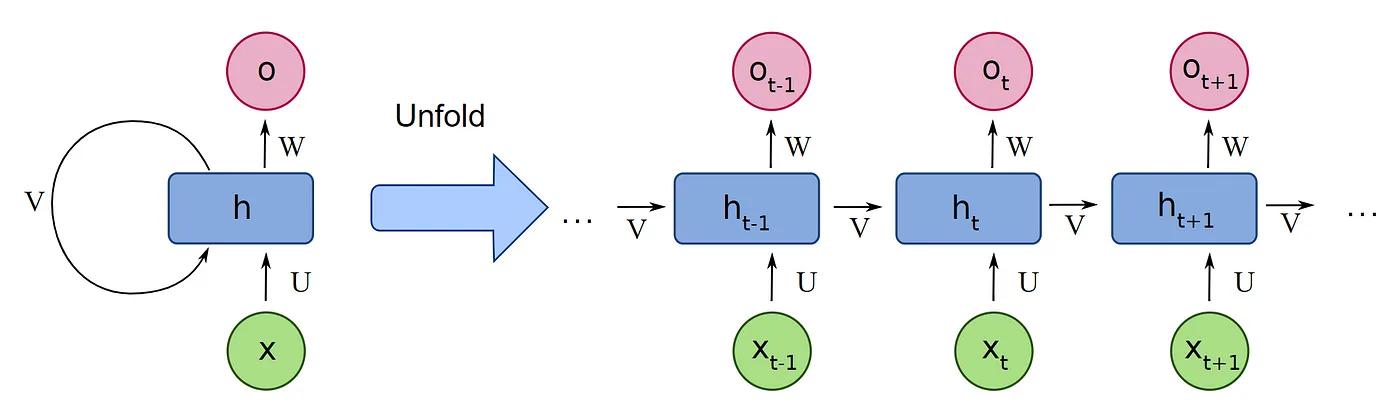

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">
The basic building block for RNN shown above suffers from some problems. One of the most important is the inability to retain information when the sequence given is long. It forgets information that was supplied several time-steps ago. 

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">
So people created some architectures to tackle that. The most popular are Long short-term memory(LSTM) and Gated Recurrent Unit(GRU)

In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    activation="swish",
                                    kernel_initializer="he_normal"))

In [ ]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [ ]:
from pathlib import Path


In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath="my_cifar10_model.keras",  # Add ".h5" extension
    save_best_only=True
)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs

In [ ]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

In [ ]:
model.evaluate(X_valid, y_valid)


In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.keras",
                                                         save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid, y_valid)

CNN:

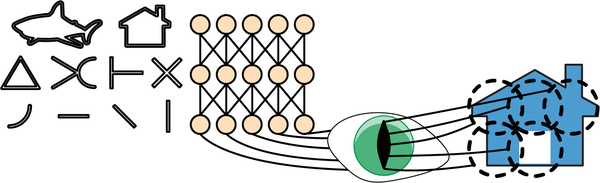

The image illustrates the concept of how a neural network, particularly a convolutional neural network (CNN), processes and recognizes visual patterns.

**Input Layer (Left Side)**: The objects on the left (shapes, lines, a shark, and a house) represent various visual inputs that the neural network might be trained on or recognize.

**Neural Network (Middle)**: The middle part with interconnected nodes symbolizes the layers of a neural network. These layers process the input through multiple neurons, extracting and combining features to detect patterns. This is typical in CNNs, where early layers detect simple features like edges and lines, and deeper layers recognize more complex patterns and objects.

**Output Layer (Right Side)**: The blue house on the right side represents the final recognition or classification made by the network. The "eye" suggests that the neural network has successfully recognized the input as a house, indicating the system's ability to "see" or understand the visual input after processing it.

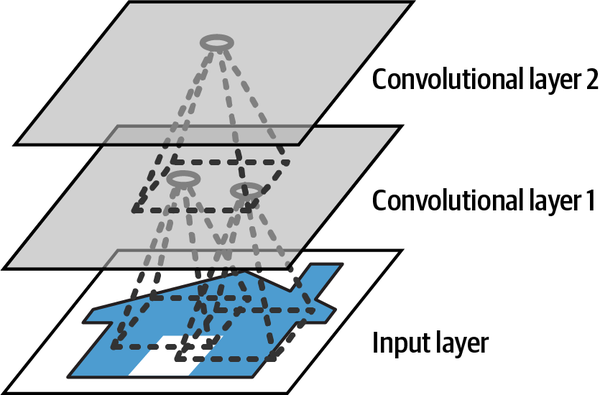

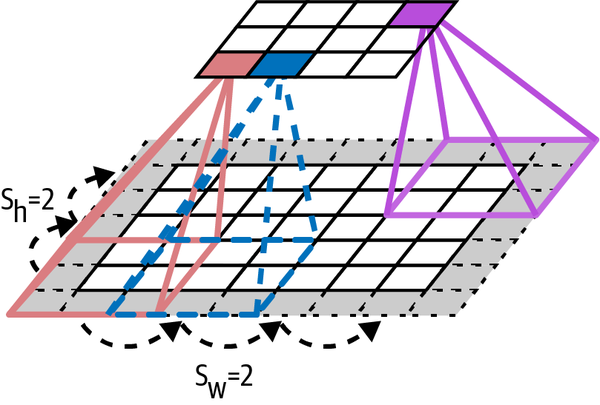

Key Concepts in the Image:
Convolutional Filter (Kernel):

The red and purple shaded areas represent a convolutional filter or kernel.
Filter Dimensions: The dimensions of the filter are indicated as 
𝑓
ℎ
=
3
f 
h
​
 =3 and 
𝑓
𝑤
=
3
f 
w
​
 =3, meaning the filter is 3x3 pixels in size.
The filter slides over the input image to perform the convolution operation, which involves multiplying the filter values by the corresponding input pixel values and summing them to produce a single output value. This process is repeated as the filter moves across the entire image.

**Input Image**:

The bottom grid represents the input image (or the feature map from a previous layer) on which the convolution is being performed.
The filter starts at a specific location on the input grid and moves across it to generate the output feature map.

**Strides**:

The arrows labeled "i" and "j" indicate the direction in which the filter moves across the image. The filter shifts in both horizontal and vertical directions according to the stride, which is the step size for the movement.

**Zero Padding**:

The gray shaded area around the input image represents zero padding.
Purpose: Zero padding is added to the borders of the input image to control the spatial dimensions of the output feature map. By adding zero padding, the filter can still process the border pixels of the image without reducing the output size.
Without zero padding, the output feature map would be smaller than the input image because the filter would not fully cover the edge pixels.

**Output Feature Map**:

The top grid represents the output feature map that is generated by applying the convolutional filter across the input image.
Each position on the output feature map corresponds to a specific region of the input image that the filter has processed.

**feature map** (or activation map) refers to the output of a convolutional layer after applying filters (kernels) to the input image or to the previous layer’s feature maps

## Implementing Convolutional Layers with Keras


In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

In [ ]:
images.shape

The shape of a tensor like TensorShape([2, 70, 120, 3]) provides information about its dimensions and the structure of the data it holds. Here’s what each of these numbers represents:

2: This is the number of images (or samples) in the batch. In this case, there are 2 images.

70: This is the height of each image in pixels. Each image has a height of 70 pixels.

120: This is the width of each image in pixels. Each image has a width of 120 pixels.

3: This represents the number of color channels in each image. For RGB images, there are 3 color channels (Red, Green, and Blue).

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">
Now let’s create a 2D convolutional layer and feed it these images to see what comes out. For this, Keras provides a Convolution2D layer, alias Conv2D. Under the hood, this layer relies on TensorFlow’s tf.nn.conv2d() operation. Let’s create a convolutional layer with 32 filters, each of size 7 × 7 (using kernel_size=7, which is equivalent to using kernel_size=(7 , 7)), and apply this layer to our small batch of two images:

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

## No Padding 

In [ ]:
fmaps.shape

After applying a convolutional layer, you get a tensor shape like TensorShape([2, 64, 114, 32]). Here’s how to interpret each dimension:

2: This represents the batch size, indicating there are 2 images in the batch.

64: This is the height of the feature maps produced by the convolutional layer. The height of each feature map is 64 pixels.

114: This is the width of the feature maps. The width of each feature map is 114 pixels.

32: This is the number of filters (or feature maps) used in the convolutional layer. There are 32 different feature maps, each representing different detected features or patterns.

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,
                                  padding="same")
fmaps = conv_layer(images)
fmaps.shape

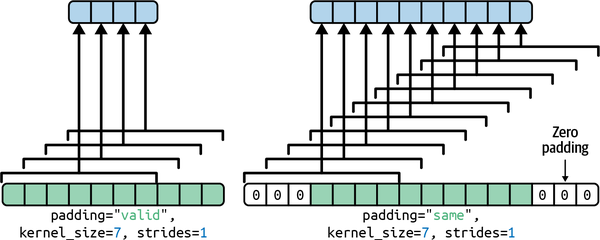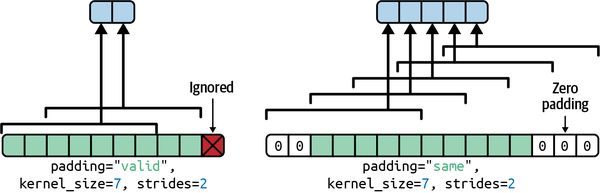

**Left side:**

**Padding="valid":**
No padding is added to the input image. This means that the output feature map will be smaller than the input image.
Kernel_size=7, strides=1: The kernel size is 7x7, meaning that the filter will examine a 7x7 region of the input image at a time. The stride is 1, meaning that the filter will move one pixel at a time across the input image.

**Right side:**

**Padding="same":** 
Zero padding is added to the input image to ensure that the output feature map is the same size as the input image.

Kernel_size=7, strides=1: The kernel size and stride are the same as on the left side.
Key points:

**Padding="valid":**

Output size is smaller than input size.
Information at the edges of the input image is lost.
Useful when you want to reduce the spatial dimensions of the feature maps.

**Padding="same":**
Output size is the 
same as the input size.
Information at the edges of the input image is preserved.
Useful when you want to maintain the spatial dimensions of the feature maps.